In [1]:
# data manipulation
import pandas as pd
import numpy as np
import json

# statistical analysis and modeling 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import scipy.stats as stats

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
df = pd.read_csv('data/spotify-2023.csv', encoding='ISO-8859-1')
df.head()


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [4]:
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [5]:
df = df.drop(df[df['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3'].index)

In [6]:
df.streams.unique()

array(['141381703', '133716286', '140003974', '800840817', '303236322',
       '183706234', '725980112', '58149378', '95217315', '553634067',
       '505671438', '58255150', '1316855716', '387570742', '2513188493',
       '1163093654', '496795686', '30546883', '335222234', '363369738',
       '86444842', '52135248', '1297026226', '200647221', '115364561',
       '78300654', '899183384', '61245289', '429829812', '127408954',
       '22581161', '52294266', '843957510', '999748277', '618990393',
       '123122413', '188933502', '1355959075', '786181836', '176553476',
       '354495408', '2808096550', '1109433169', '1047101291', '65156199',
       '570515054', '1085685420', '1647990401', '2565529693', '518745108',
       '107753850', '177740666', '153372011', '57876440', '1813673666',
       '3703895074', '256483385', '1214083358', '16011326', '812019557',
       '111947664', '156338624', '720434240', '357925728', '674072710',
       '1755214421', '404562836', '373199958', '14780425', '395

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    object
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    object
 12  in_deezer_charts      952 non-null    int64 
 13  in_shazam_charts      902 non-null    object
 14  bpm                   952 non-null    int64 
 15  key                   857 non-null    object


In [8]:
df.in_deezer_playlists.unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2,445', '74', '57', '213', '109', '3,394', '3,421',
       '39', '142', '73', '102', '4', '89', '4,053', '169', '31', '8',
       '707', '1,056', '164', '4,095', '68', '331', '80', '18', '1,003',
       '71', '25', '5', '798', '110', '1,800', '141', '2,703', '35', '29',
       '0', '69', '63', '1,632', '163', '19', '59', '2,394', '1,034',
       '327', '2,163', '695', '2,655', '476', '145', '47', '61', '246',
       '38', '52', '6,551', '1,212', '1,078', '7', '282', '254', '588',
       '1', '2,094', '2,969', '26', '3,889', '99', '5,239', '44', '3',
       '974', '356', '12', '453', '3,631', '113', '112', '435', '929',
       '939', '4,607', '806', '885', '28', '2,733', '3,425', '

In [9]:
df['in_deezer_playlists']=df['in_deezer_playlists'].str.replace(',','')
df.in_deezer_playlists.unique()

array(['45', '58', '91', '125', '87', '88', '43', '30', '48', '66', '54',
       '21', '745', '182', '863', '161', '78', '95', '23', '10', '42',
       '582', '32', '318', '41', '15', '143', '50', '13', '245', '165',
       '184', '34', '24', '410', '151', '6', '843', '537', '247', '65',
       '138', '458', '2445', '74', '57', '213', '109', '3394', '3421',
       '39', '142', '73', '102', '4', '89', '4053', '169', '31', '8',
       '707', '1056', '164', '4095', '68', '331', '80', '18', '1003',
       '71', '25', '5', '798', '110', '1800', '141', '2703', '35', '29',
       '0', '69', '63', '1632', '163', '19', '59', '2394', '1034', '327',
       '2163', '695', '2655', '476', '145', '47', '61', '246', '38', '52',
       '6551', '1212', '1078', '7', '282', '254', '588', '1', '2094',
       '2969', '26', '3889', '99', '5239', '44', '3', '974', '356', '12',
       '453', '3631', '113', '112', '435', '929', '939', '4607', '806',
       '885', '28', '2733', '3425', '238', '1378', '1089', '22

In [10]:
df.in_shazam_charts.unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1,021', '1,281', nan, '187', '0', '1,173',
       '29', '150', '73', '139', '1,093', '96', '211', '325', '294',
       '197', '27', '310', '354', '184', '212', '81', '82', '100', '62',
       '69', '727', '311', '1,133', '102', '332', '259', '140', '16',
       '110', '810', '176', '615', '210', '216', '215', '167', '37',
       '171', '272', '529', '26', '5', '169', '230', '84', '154', '93',
       '115', '72', '8', '323', '49', '1,451', '1,170', '429', '162',
       '10', '478', '236', '200', '78', '266', '486', '204', '34', '202',
       '312', '32', '153', '519', '458', '48', '666', '14', '925', '88',
       '203', '44', '74', '638', '64', '71', '2', '3', '136', '148', '22',
       '368', '1', '189', '52', '9', '31', '66', '208', '28', '558',
       '195', '13', '60', '503', '56', '15', '454', '40', '285', '129',
       '58', '117', '47', '20', '30', '80', '263', '116', '57', '39',
  

In [11]:
df['in_shazam_charts']=df['in_shazam_charts'].str.replace(',','')
df = df.drop(df[df['in_shazam_charts'] == 'nan'].index)

In [12]:
df.in_shazam_charts.unique()

array(['826', '382', '949', '548', '425', '946', '418', '194', '953',
       '339', '251', '168', '1021', '1281', nan, '187', '0', '1173', '29',
       '150', '73', '139', '1093', '96', '211', '325', '294', '197', '27',
       '310', '354', '184', '212', '81', '82', '100', '62', '69', '727',
       '311', '1133', '102', '332', '259', '140', '16', '110', '810',
       '176', '615', '210', '216', '215', '167', '37', '171', '272',
       '529', '26', '5', '169', '230', '84', '154', '93', '115', '72',
       '8', '323', '49', '1451', '1170', '429', '162', '10', '478', '236',
       '200', '78', '266', '486', '204', '34', '202', '312', '32', '153',
       '519', '458', '48', '666', '14', '925', '88', '203', '44', '74',
       '638', '64', '71', '2', '3', '136', '148', '22', '368', '1', '189',
       '52', '9', '31', '66', '208', '28', '558', '195', '13', '60',
       '503', '56', '15', '454', '40', '285', '129', '58', '117', '47',
       '20', '30', '80', '263', '116', '57', '39', '111', '7

In [13]:
df[["streams", "in_deezer_playlists", "in_shazam_charts"]] = df[["streams", "in_deezer_playlists", "in_shazam_charts"]].apply(pd.to_numeric)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    int64  
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   857 no

In [15]:
df.drop(['in_shazam_charts', 'key', 'mode'], axis=1, inplace=True )

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            952 non-null    object
 1   artist(s)_name        952 non-null    object
 2   artist_count          952 non-null    int64 
 3   released_year         952 non-null    int64 
 4   released_month        952 non-null    int64 
 5   released_day          952 non-null    int64 
 6   in_spotify_playlists  952 non-null    int64 
 7   in_spotify_charts     952 non-null    int64 
 8   streams               952 non-null    int64 
 9   in_apple_playlists    952 non-null    int64 
 10  in_apple_charts       952 non-null    int64 
 11  in_deezer_playlists   952 non-null    int64 
 12  in_deezer_charts      952 non-null    int64 
 13  bpm                   952 non-null    int64 
 14  danceability_%        952 non-null    int64 
 15  valence_%             952 non-null    int64 


In [17]:
#popularity will be defined as the highest no. of streams

C:\Users\nyssa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


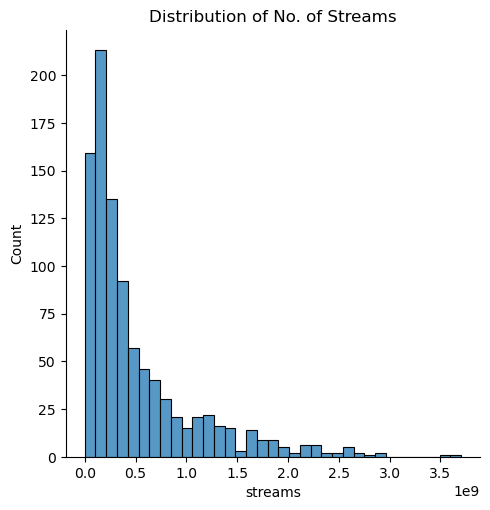

In [18]:
sns.displot(df['streams'])
plt.title('Distribution of No. of Streams')

plt.show()

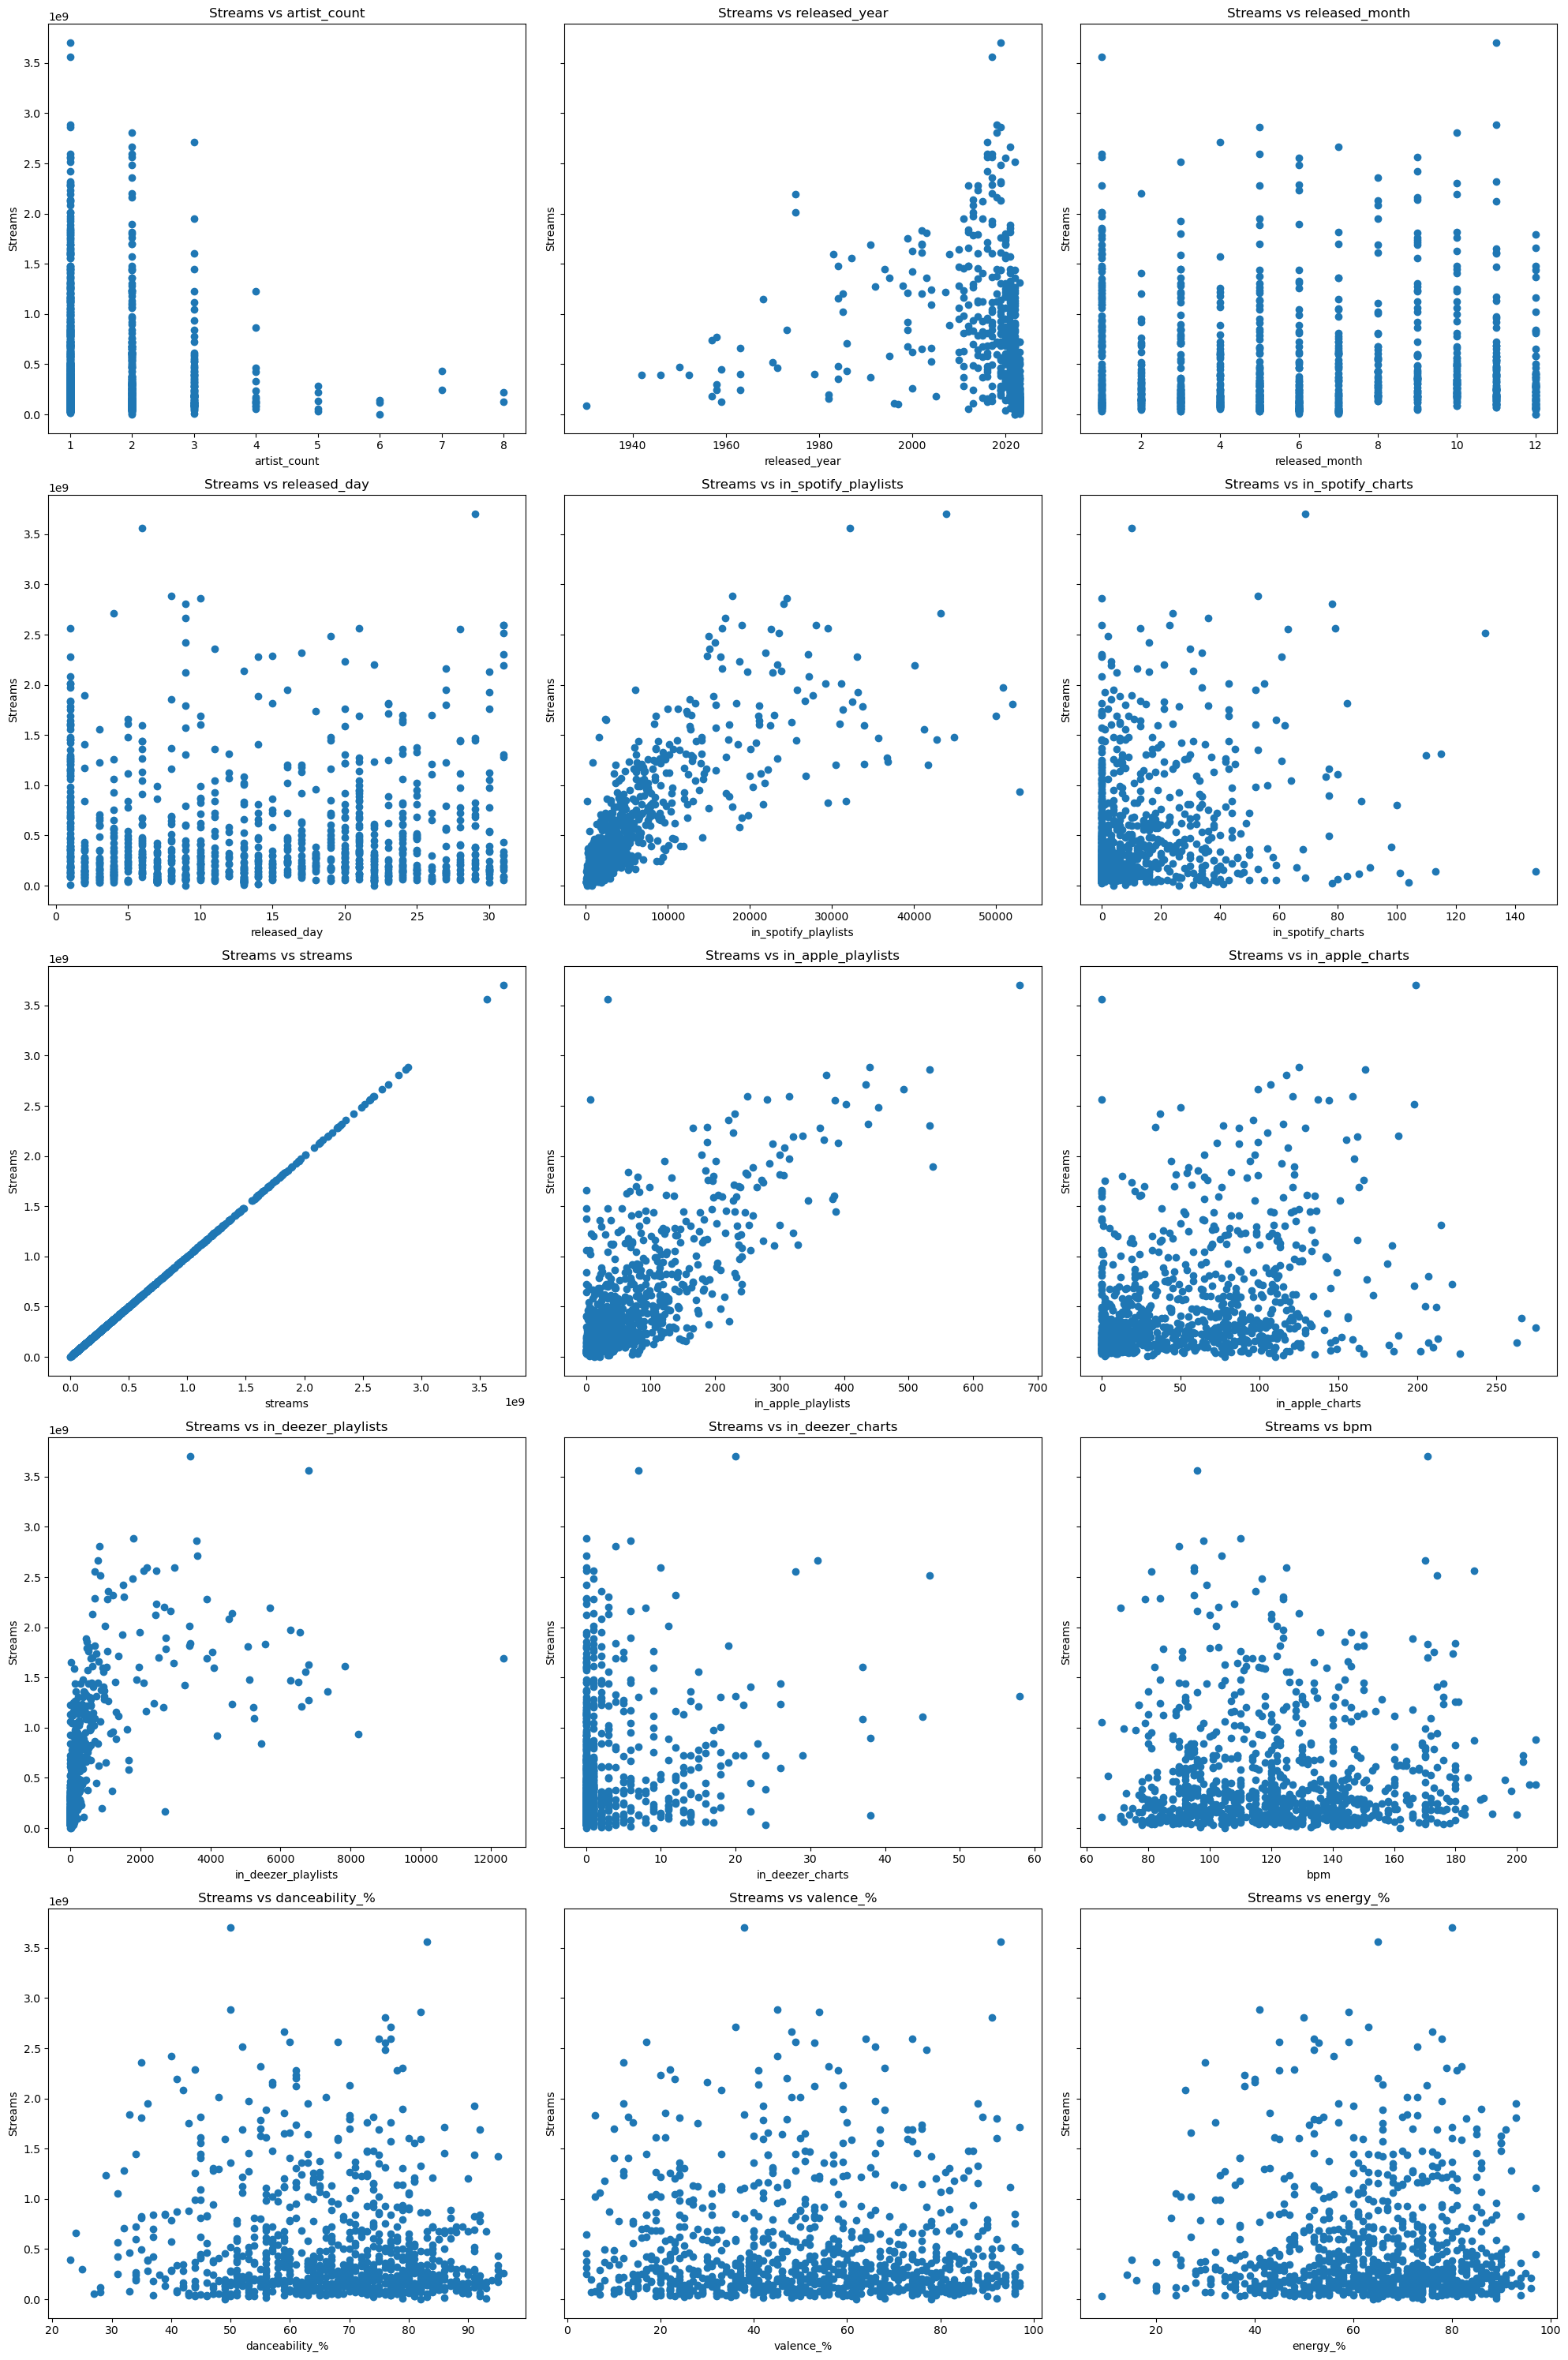

In [19]:
#now to see the relationships between each other variable
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20,30), sharey=True)

for ax, column in zip(axes.flatten(), df.columns[2:20]):
    ax.scatter(df[column], df['streams'], label=column, alpha=1)
    ax.set_title(f'Streams vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Streams')

fig.tight_layout()

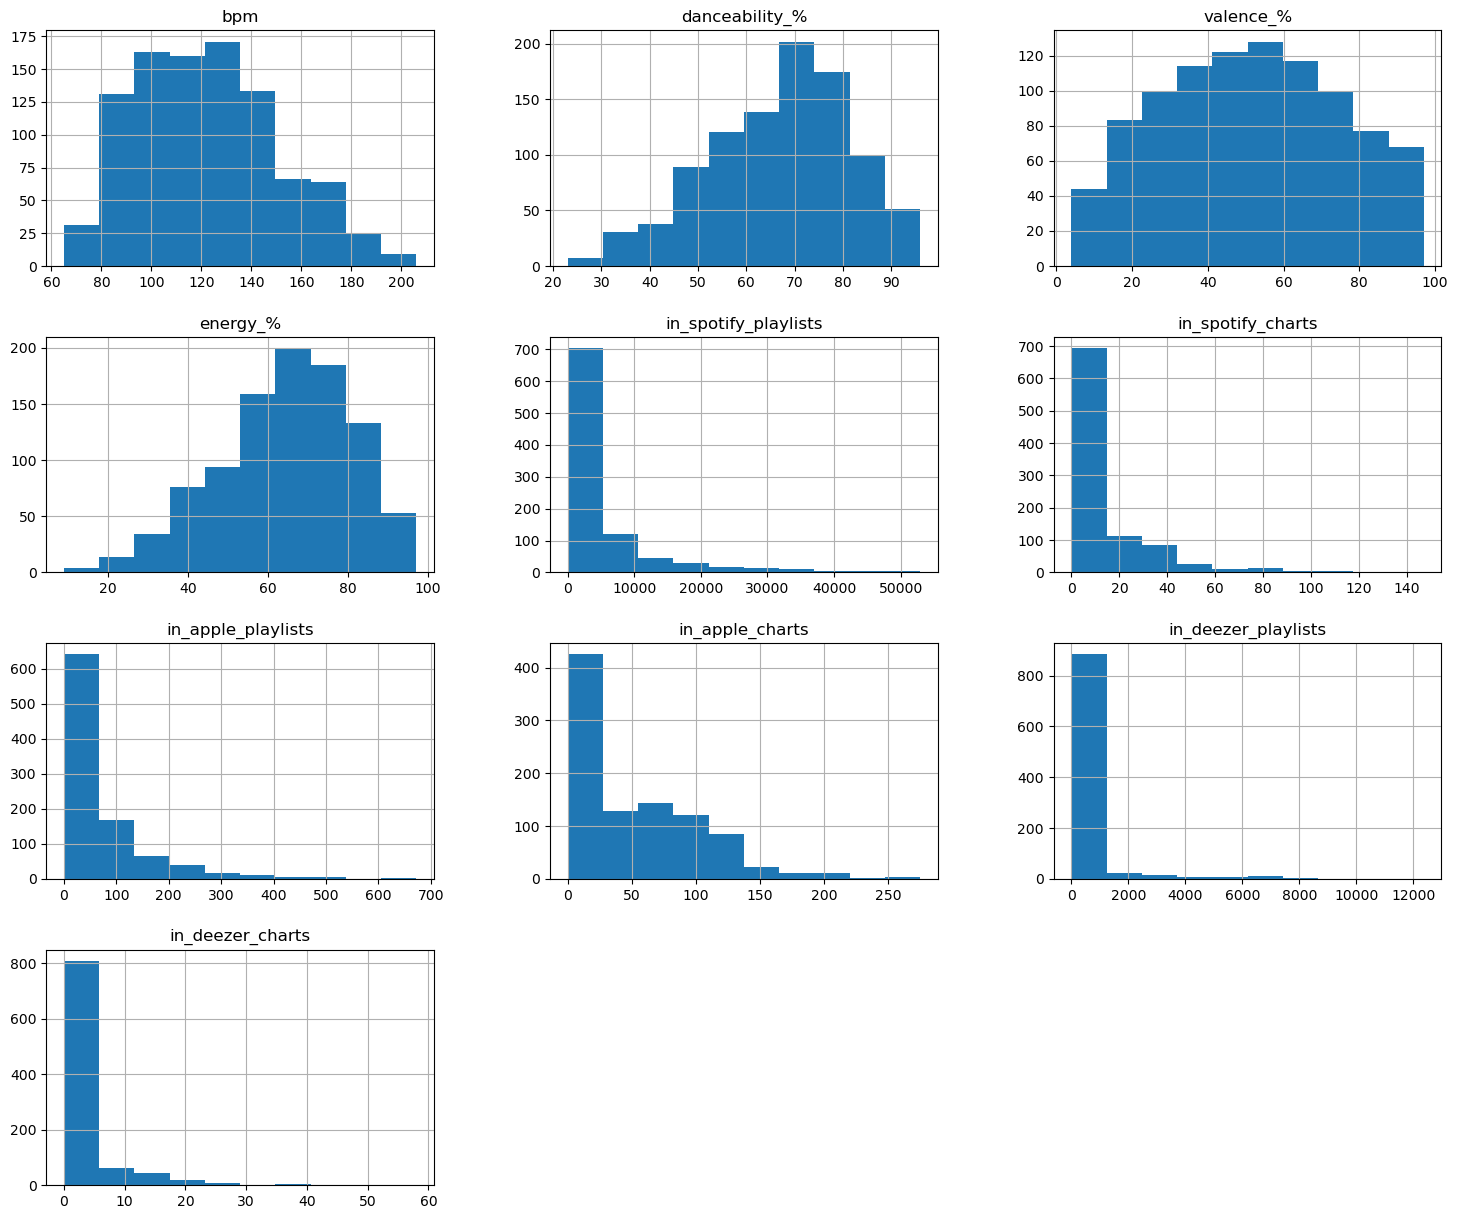

In [20]:
df[['bpm', 'danceability_%', 'valence_%',
       'energy_%', 'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']].hist(figsize=(18,15))
ax.ticklabel_format(style='plain')

plt.show()

In [21]:
df2 = df.drop(columns=['track_name','artist(s)_name'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          952 non-null    int64
 1   released_year         952 non-null    int64
 2   released_month        952 non-null    int64
 3   released_day          952 non-null    int64
 4   in_spotify_playlists  952 non-null    int64
 5   in_spotify_charts     952 non-null    int64
 6   streams               952 non-null    int64
 7   in_apple_playlists    952 non-null    int64
 8   in_apple_charts       952 non-null    int64
 9   in_deezer_playlists   952 non-null    int64
 10  in_deezer_charts      952 non-null    int64
 11  bpm                   952 non-null    int64
 12  danceability_%        952 non-null    int64
 13  valence_%             952 non-null    int64
 14  energy_%              952 non-null    int64
 15  acousticness_%        952 non-null    int64
 16  instrumentaln

In [22]:
corr = df2.corr()
corr

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.085614,0.037117,-0.018493,-0.102184,-0.018916,-0.136463,-0.051487,-0.089336,-0.071716,-0.004022,-0.038680,0.206543,0.128712,0.137317,-0.101619,-0.050359,0.042681,0.119486
released_year,0.085614,1.000000,0.071055,0.169733,-0.397519,0.067564,-0.230803,-0.203799,-0.040950,-0.311260,0.094321,-0.007448,0.184904,-0.055354,0.097502,-0.129000,-0.015575,-0.006285,0.131884
released_month,0.037117,0.071055,1.000000,0.078391,-0.105308,-0.048594,-0.024938,-0.001054,-0.020618,-0.088536,-0.005948,-0.039962,-0.047893,-0.117267,-0.083378,0.053357,0.033742,-0.012492,0.038821
released_day,-0.018493,0.169733,0.078391,1.000000,-0.080191,0.020996,0.010598,0.025555,0.009586,-0.085084,0.072718,-0.030873,0.047613,0.044332,0.051022,-0.006938,0.019022,0.001436,-0.016911
in_spotify_playlists,-0.102184,-0.397519,-0.105308,-0.080191,1.000000,0.164182,0.789822,0.708258,0.271162,0.826388,0.144227,-0.019739,-0.106885,-0.021585,0.033899,-0.064683,-0.028194,-0.046725,-0.089973
in_spotify_charts,-0.018916,0.067564,-0.048594,0.020996,0.164182,1.000000,0.245821,0.233057,0.551985,0.088190,0.600101,0.034435,0.029475,0.036205,0.082124,-0.055513,-0.010270,-0.047619,-0.082267
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.598131,0.228598,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051487,-0.203799,-0.001054,0.025555,0.708258,0.233057,0.772063,1.000000,0.414184,0.472034,0.368862,0.023450,-0.025945,0.057749,0.052807,-0.062299,-0.057349,-0.049662,-0.108515
in_apple_charts,-0.089336,-0.040950,-0.020618,0.009586,0.271162,0.551985,0.320234,0.414184,1.000000,0.173330,0.383443,0.030500,-0.026260,0.048868,0.105199,-0.077692,-0.013356,-0.018839,-0.152440
in_deezer_playlists,-0.071716,-0.311260,-0.088536,-0.085084,0.826388,0.088190,0.598131,0.472034,0.173330,1.000000,0.066466,-0.035539,-0.071821,-0.013558,0.064958,-0.063543,-0.017032,-0.026772,-0.062515


In [23]:
corr[abs(corr>.50)]

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
released_year,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
released_month,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
released_day,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_spotify_playlists,NaN,NaN,NaN,NaN,1.000000,NaN,0.789822,0.708258,NaN,0.826388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_spotify_charts,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.551985,NaN,0.600101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
streams,NaN,NaN,NaN,NaN,0.789822,NaN,1.000000,0.772063,NaN,0.598131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,NaN,NaN,NaN,NaN,0.708258,NaN,0.772063,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_charts,NaN,NaN,NaN,NaN,NaN,0.551985,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_deezer_playlists,NaN,NaN,NaN,NaN,0.826388,NaN,0.598131,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
corr['streams'].sort_values(ascending=False)

streams                 1.000000
in_spotify_playlists    0.789822
in_apple_playlists      0.772063
in_deezer_playlists     0.598131
in_apple_charts         0.320234
in_spotify_charts       0.245821
in_deezer_charts        0.228598
released_day            0.010598
bpm                    -0.002438
acousticness_%         -0.004485
released_month         -0.024938
energy_%               -0.026051
valence_%              -0.040831
instrumentalness_%     -0.044902
liveness_%             -0.048337
danceability_%         -0.105457
speechiness_%          -0.112333
artist_count           -0.136463
released_year          -0.230803
Name: streams, dtype: float64

<Axes: >

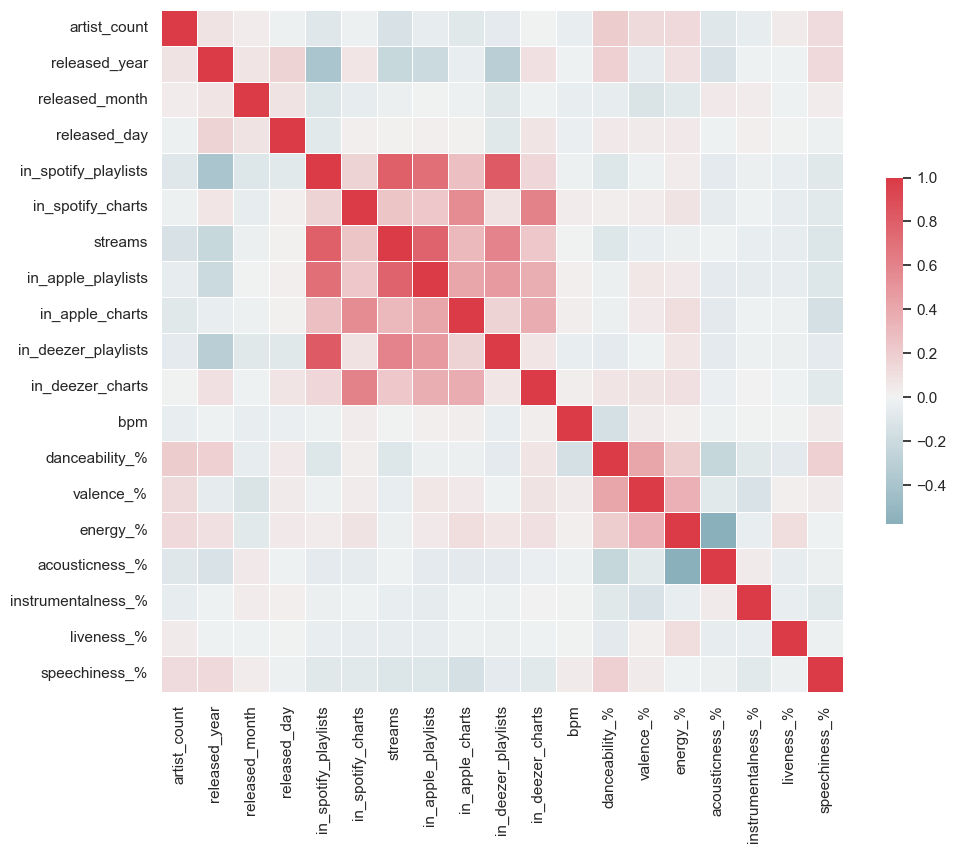

In [25]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
# In spotify charts, playlists, apple charts and playlists and deezer charts and playlists are highly correlated. So these values will be removed.
#from these models we can see quite easily that the no of. streams goes up the more places the song appears.
#ie the more charts and playlists the song is in the more streams it will get. 
#but we want to know what makes a song popular. So i'm going to just continue with bpm, dacneability, valence, 
#energy, acousticness, instrumentalness, liveness and speechiness.

df3 = df2.drop(columns=['artist_count','released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts',
                        'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   streams             952 non-null    int64
 1   bpm                 952 non-null    int64
 2   danceability_%      952 non-null    int64
 3   valence_%           952 non-null    int64
 4   energy_%            952 non-null    int64
 5   acousticness_%      952 non-null    int64
 6   instrumentalness_%  952 non-null    int64
 7   liveness_%          952 non-null    int64
 8   speechiness_%       952 non-null    int64
dtypes: int64(9)
memory usage: 74.4 KB


In [27]:
df4= df3.rename(columns={"danceability_%": "danceability", "valence_%": "valence", "energy_%": "energy", 
                    "acousticness_%": "acousticness", "instrumentalness_%": "instrumentalness", "liveness_%": "liveness", 
                    "speechiness_%": "speechiness"})

In [28]:
f1= 'streams~bpm'
f2= 'streams~danceability'
f3= 'streams~valence'
f4= 'streams~energy'
f5= 'streams~acousticness'
f6= 'streams~instrumentalness'
f7= 'streams~liveness'
f8= 'streams~speechiness'
f9= 'streams~bpm+ danceability+ valence+ energy+ acousticness+ instrumentalness+ liveness+ speechiness'

In [29]:
model1 = ols(formula=f9, data=df4).fit()

In [30]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     3.558
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           0.000450
Time:                        12:33:15   Log-Likelihood:                -20524.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     943   BIC:                         4.111e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.037e+09   1.69e+08      6.128      0.000    7.05e+08    1.37e+09
bpm              -3.078e+05   6.62e+05     -0.465      0.642   -1.61e+06    9.92e+05
danceability     -4.227e+06   1.46e+06     -2.886      0.004    -7.1e+06   -1.35e+06
valence           2.192e+05   9.32e+05      0.235      0.814   -1.61e+06    2.05e+06
energy           -1.119e+06   1.47e+06     -0.761      0.447      -4e+06    1.77e+06
acousticness     -1.121e+06   8.95e+05     -1.253      0.211   -2.88e+06    6.36e+05
instrumentalness -4.291e+06   2.19e+06     -1.957      0.051   -8.59e+06    1.21e+04
liveness         -2.519e+06   1.34e+06     -1.873      0.061   -5.16e+06     1.2e+05
speechiness      -5.719e+06   1.88e+06     -3.044      0.002   -9.41e+06   -2.03e+06
==============================================================================
Omnibus:                      377.983   Durbin-Watson:                   1.521
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1334.683
Skew:                           1.944   Prob(JB):                    1.50e-290
Kurtosis:                       7.305   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\1034564504.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


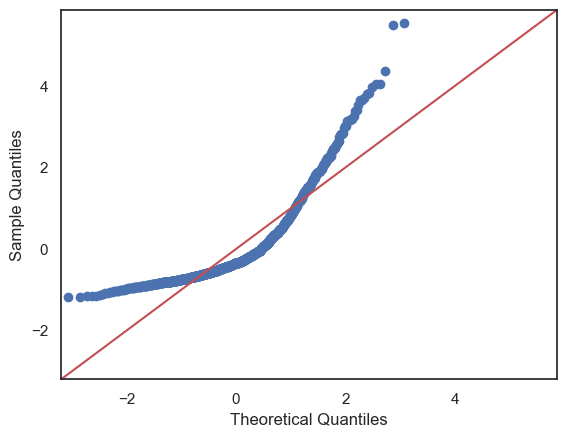

In [31]:
residuals = model1.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [32]:
# Log transform and normalize


# log features
log_names = [f'{column}_log' for column in df4.columns]

df4_log = np.log(df4)
df4_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df4_log_norm = df4_log.apply(normalize)

C:\Users\nyssa\anaconda3\Lib\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [33]:
preprocessed = pd.concat([df4_log_norm], axis=1)
preprocessed.head()

,streams_log,bpm_log,danceability_log,valence_log,energy_log,acousticness_log,instrumentalness_log,liveness_log,speechiness_log
0,-0.645275,0.199992,0.837565,1.155540,0.969533,NaN,NaN,-0.982993,-0.765375
1,-0.693904,-1.134334,0.350114,0.524829,0.594244,NaN,NaN,-0.624139,-0.765375
2,-0.653818,0.630685,-1.001204,-0.552292,-0.497114,NaN,NaN,1.195352,-0.238408
3,0.867601,1.538496,-0.692806,0.440630,0.504656,NaN,NaN,-0.470864,0.952459
4,0.020392,0.815950,-0.010502,-1.103662,0.849160,NaN,NaN,-0.470864,-0.238408


In [34]:
X = preprocessed.drop('streams_log', axis=1)
y = preprocessed['streams_log']

In [35]:
X1= X.drop('acousticness_log', axis=1)

In [36]:
X2 = X1.drop('instrumentalness_log', axis=1)

In [37]:
import statsmodels.api as sm
X_int = sm.add_constant(X2)
model = sm.OLS(y,X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            streams_log   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.491
Date:                Sat, 16 Dec 2023   Prob (F-statistic):             0.0214
Time:                        12:33:15   Log-Likelihood:                -1342.9
No. Observations:                 952   AIC:                             2700.
Df Residuals:                     945   BIC:                             2734.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.473e-15      0.032   4.57e-14      1.000      -0.063       0.063
bpm_log             -0.0002      0.033     -0.006      0.995      -0.064       0.064
danceability_log    -0.0515      0.037     -1.398      0.162      -0.124       0.021
valence_log         -0.0155      0.037     -0.422      0.673      -0.088       0.057
energy_log           0.0136      0.035      0.387      0.699      -0.055       0.083
liveness_log        -0.0631      0.033     -1.939      0.053      -0.127       0.001
speechiness_log     -0.0841      0.033     -2.529      0.012      -0.149      -0.019
==============================================================================
Omnibus:                      354.324   Durbin-Watson:                   1.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5359.720
Skew:                          -1.277   Prob(JB):                         0.00
Kurtosis:                      14.340   Cond. No.                         1.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\230832741.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


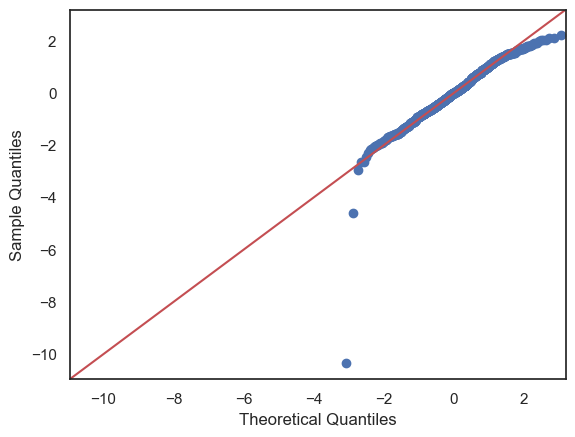

In [38]:
residuals2 = model.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True)
fig.show()

In [39]:
# the log transform actually created a worse r2 result so trying somehting else

array([[<Axes: title={'center': 'bpm'}>,
        <Axes: title={'center': 'danceability'}>],
       [<Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'speechiness'}>]], dtype=object)

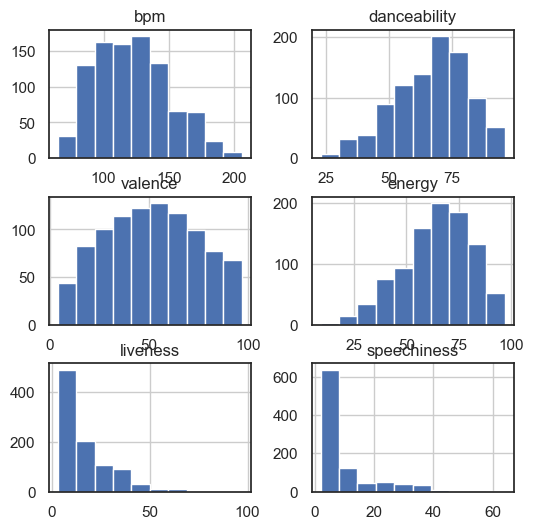

In [40]:
df4[['bpm', 'danceability', 'valence', 'energy', 'liveness', 'speechiness' ]].hist(figsize  = [6, 6])

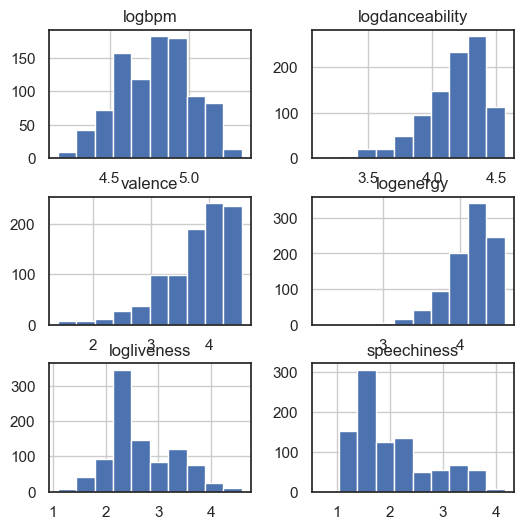

In [41]:
data_log = pd.DataFrame([])
data_log['logbpm'] = np.log(df4['bpm'])
data_log['logdanceability'] = np.log(df4['danceability'])
data_log['valence'] = np.log(df4['valence'])
data_log['logenergy'] = np.log(df4['energy'])
data_log['logliveness'] = np.log(df4['liveness'])
data_log['speechiness'] = np.log(df4['speechiness'])
data_log.hist(figsize  = [6, 6]);

In [42]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [43]:
predictors = df4.drop('streams', axis=1)

In [44]:
result = stepwise_selection(predictors, df4['streams'], verbose=True)
print('resulting features:')
print(result)

Add  speechiness                    with p-value 0.000515788
Add  danceability                   with p-value 0.0074195
resulting features:
['speechiness', 'danceability']


In [45]:
df5= df4.drop(['bpm', 'valence', 'energy', 'liveness', 'acousticness', 'instrumentalness'], axis=1 )

In [46]:
f10= 'streams~speechiness+ danceability'

In [47]:
model2 = ols(formula=f2, data=df5).fit()
model3 = ols(formula=f8, data=df5).fit()
model4 = ols(formula=f10, data=df5).fit()

In [48]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     10.68
Date:                Sat, 16 Dec 2023   Prob (F-statistic):            0.00112
Time:                        12:33:17   Log-Likelihood:                -20533.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     950   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.878e+08   8.57e+07      9.193      0.000     6.2e+08    9.56e+08
danceability -4.086e+06   1.25e+06     -3.269      0.001   -6.54e+06   -1.63e+06
==============================================================================
Omnibus:                      384.872   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.210
Skew:                           1.978   Prob(JB):                    5.31e-300
Kurtosis:                       7.370   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     12.14
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           0.000516
Time:                        12:33:17   Log-Likelihood:                -20532.
No. Observations:                 952   AIC:                         4.107e+04
Df Residuals:                     950   BIC:                         4.108e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.792e+08   2.61e+07     22.168      0.000    5.28e+08    6.31e+08
speechiness -6.422e+06   1.84e+06     -3.484      0.001      -1e+07   -2.81e+06
==============================================================================
Omnibus:                      384.530   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1368.228
Skew:                           1.980   Prob(JB):                    7.82e-298
Kurtosis:                       7.338   Cond. No.                         20.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     9.710
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           6.69e-05
Time:                        12:33:17   Log-Likelihood:                -20529.
No. Observations:                 952   AIC:                         4.106e+04
Df Residuals:                     949   BIC:                         4.108e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.975e+08   8.54e+07      9.336      0.000     6.3e+08    9.65e+08
speechiness  -5.497e+06   1.87e+06     -2.941      0.003   -9.17e+06   -1.83e+06
danceability -3.399e+06   1.27e+06     -2.683      0.007   -5.88e+06   -9.13e+05
==============================================================================
Omnibus:                      382.767   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1366.930
Skew:                           1.967   Prob(JB):                    1.50e-297
Kurtosis:                       7.358   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\3721656687.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()


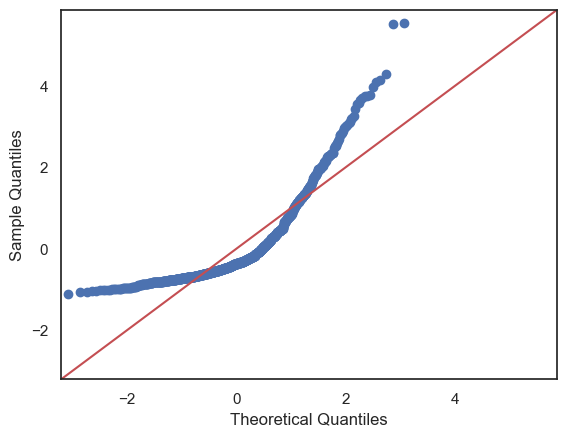

In [51]:
residuals3 = model2.resid
fig3 = sm.graphics.qqplot(residuals3, dist=stats.norm, line='45', fit=True)
fig3.show()

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\2548717847.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig4.show()


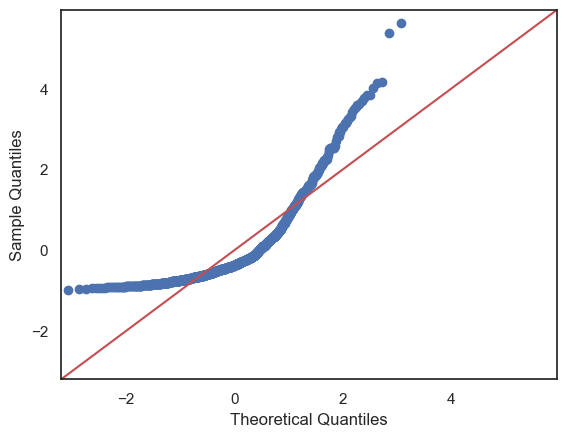

In [52]:
residuals4 = model3.resid
fig4 = sm.graphics.qqplot(residuals4, dist=stats.norm, line='45', fit=True)
fig4.show()

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\1096589143.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig5.show()


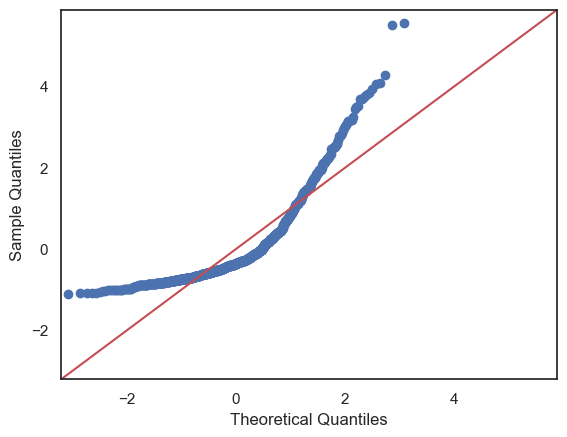

In [53]:
residuals5 = model4.resid
fig5 = sm.graphics.qqplot(residuals5, dist=stats.norm, line='45', fit=True)
fig5.show()

In [54]:
# the fit is still not great so I'm going to try a polynomial regression method to see if I can make it fit any better.

In [55]:
df6=df5.drop('speechiness', axis=1)
df6.head()

,streams,danceability
0,141381703,80
1,133716286,71
2,140003974,51
3,800840817,55
4,303236322,65


In [57]:
df7= df5.drop('danceability', axis=1)
df7.head()

,streams,speechiness
0,141381703,4
1,133716286,4
2,140003974,6
3,800840817,15
4,303236322,6


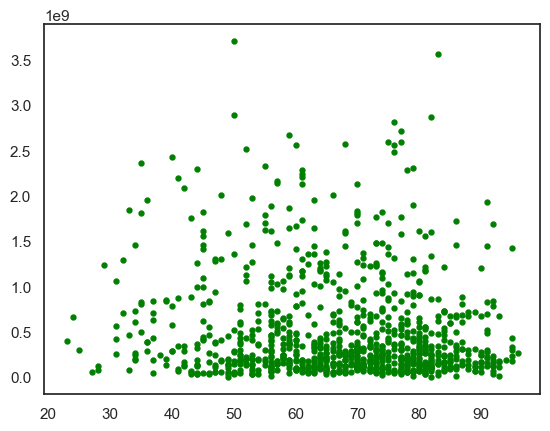

In [58]:
plt.scatter(df6['danceability'], df6['streams'], color='green', s=50, marker='.')

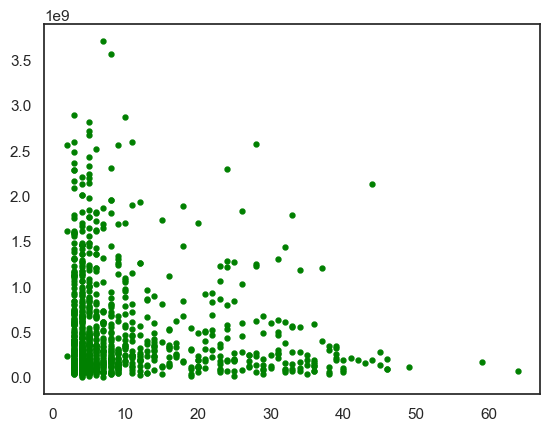

In [59]:
plt.scatter(df7['speechiness'], df6['streams'], color='green', s=50, marker='.')

In [60]:
from sklearn.model_selection import train_test_split
y6 = df6['danceability']
X6 = df6.drop(columns='danceability', axis=1)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, random_state=42, train_size=0.75)

In [62]:
y7 = df7['speechiness']
X7 = df7.drop(columns='speechiness', axis=1)
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, random_state=42, train_size=0.75)

degree 2 0.008356674384932483
degree 3 -0.015771330969566844
degree 4 -0.03371916777377937


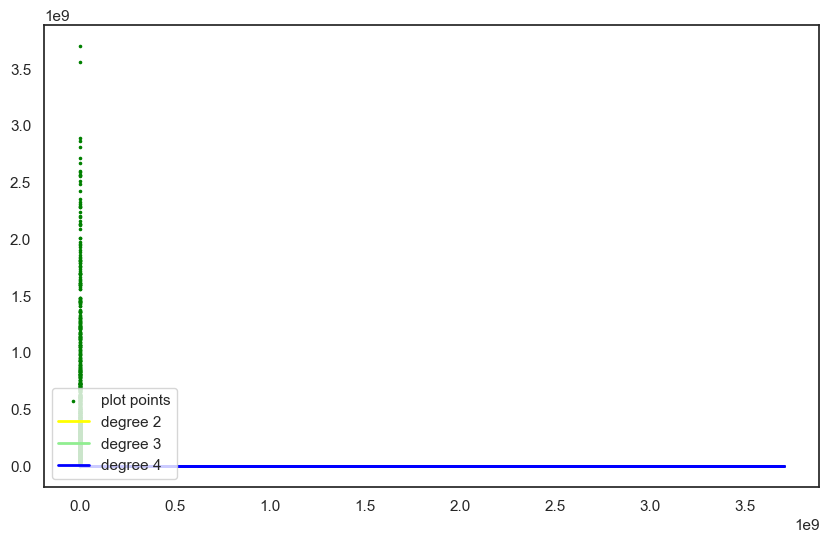

In [64]:
# Import relevant modules and functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df6['danceability'], df6['streams'], color='green', s=10, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X6_poly_train = poly.fit_transform(X6_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X6_poly_train, y6_train)
    
    # Transform the test data into polynomial features
    X6_poly_test = poly.transform(X6_test)
    
    # Get predicted values for transformed polynomial test data  
    y6_pred = reg_poly.predict(X6_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y6_test, y6_pred))
    
    # Transform the full data
    X6_poly = poly.transform(X6)
    
    # Now, we want to see what the model predicts for the entire data  
    y6_poly = reg_poly.predict(X6_poly)
    
    # Create plot of predicted values
    plt.plot(X6, y6_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

degree 2 -0.001037499068787806
degree 3 -0.006638252460536176
degree 4 -0.01041635709111155


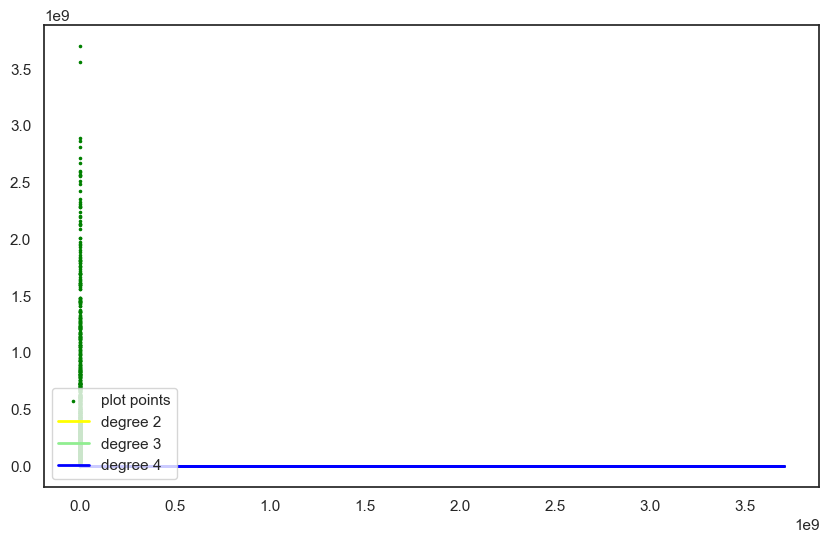

In [65]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df7['speechiness'], df6['streams'], color='green', s=10, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X7_poly_train = poly.fit_transform(X7_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X7_poly_train, y7_train)
    
    # Transform the test data into polynomial features
    X7_poly_test = poly.transform(X7_test)
    
    # Get predicted values for transformed polynomial test data  
    y7_pred = reg_poly.predict(X7_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y7_test, y7_pred))
    
    # Transform the full data
    X7_poly = poly.transform(X7)
    
    # Now, we want to see what the model predicts for the entire data  
    y7_poly = reg_poly.predict(X7_poly)
    
    # Create plot of predicted values
    plt.plot(X7, y7_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

In [66]:
#well that didn't work for curiosty i'm i'm going to run a polynomial regression on bpm and streams

In [68]:
df8= df4.drop(['speechiness', 'danceability', 'valence', 'energy', 'liveness', 'acousticness', 'instrumentalness'], axis=1 )

In [69]:
y8 = df8['bpm']
X8 = df8.drop(columns='bpm', axis=1)
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, random_state=42, train_size=0.75)

degree 2 -0.014113531055326867
degree 3 -0.026499149392087862
degree 4 -0.032990532794843874


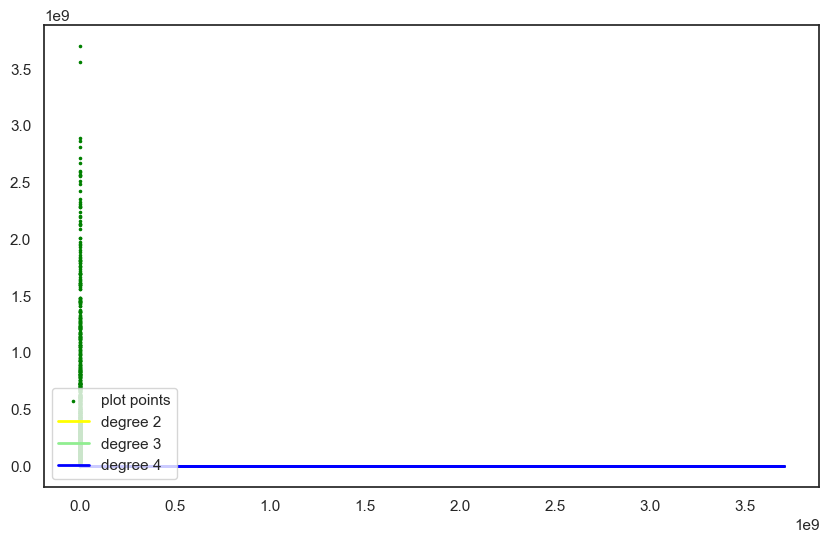

In [72]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(df8['bpm'], df6['streams'], color='green', s=10, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X8_poly_train = poly.fit_transform(X8_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X8_poly_train, y8_train)
    
    # Transform the test data into polynomial features
    X8_poly_test = poly.transform(X8_test)
    
    # Get predicted values for transformed polynomial test data  
    y8_pred = reg_poly.predict(X8_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y8_test, y8_pred))
    
    # Transform the full data
    X8_poly = poly.transform(X8)
    
    # Now, we want to see what the model predicts for the entire data  
    y8_poly = reg_poly.predict(X8_poly)
    
    # Create plot of predicted values
    plt.plot(X8, y8_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

In [73]:
#maybe i was wrong to remove the charts and playlist columns ill try spotify charts to get a better result maybe?

In [74]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 952 entries, 0 to 952
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   artist_count          952 non-null    int64
 1   released_year         952 non-null    int64
 2   released_month        952 non-null    int64
 3   released_day          952 non-null    int64
 4   in_spotify_playlists  952 non-null    int64
 5   in_spotify_charts     952 non-null    int64
 6   streams               952 non-null    int64
 7   in_apple_playlists    952 non-null    int64
 8   in_apple_charts       952 non-null    int64
 9   in_deezer_playlists   952 non-null    int64
 10  in_deezer_charts      952 non-null    int64
 11  bpm                   952 non-null    int64
 12  danceability_%        952 non-null    int64
 13  valence_%             952 non-null    int64
 14  energy_%              952 non-null    int64
 15  acousticness_%        952 non-null    int64
 16  instrumentaln

In [77]:
spotify1= df2.drop(['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_charts', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                   'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
spotify1.head()

,in_spotify_playlists,streams
0,553,141381703
1,1474,133716286
2,1397,140003974
3,7858,800840817
4,3133,303236322


In [78]:
spotify2= df2.drop(['artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                   'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
spotify2.head()

,in_spotify_charts,streams
0,147,141381703
1,48,133716286
2,113,140003974
3,100,800840817
4,50,303236322


In [80]:
spotify3= df2.drop(['artist_count', 'released_year', 'released_month', 'released_day', 'in_apple_playlists',
                   'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
                   'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'], axis=1)
spotify3.head()

,in_spotify_playlists,in_spotify_charts,streams
0,553,147,141381703
1,1474,48,133716286
2,1397,113,140003974
3,7858,100,800840817
4,3133,50,303236322


In [79]:
f11 = 'streams~ in_spotify_playlists'
f12 = 'streams~ in_spotify_charts'
f13 = 'streams~in_spotify_charts+in_spotify_playlists'

In [81]:
model5 = ols(formula=f11, data=spotify3).fit()
model6 = ols(formula=f12, data=spotify3).fit()
model7 = ols(formula=f13, data=spotify3).fit()

In [82]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1575.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          6.74e-204
Time:                        13:13:24   Log-Likelihood:                -20073.
No. Observations:                 952   AIC:                         4.015e+04
Df Residuals:                     950   BIC:                         4.016e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2.193e+08   1.35e+07     16.247      0.000    1.93e+08    2.46e+08
in_spotify_playlists  5.666e+04   1427.598     39.691      0.000    5.39e+04    5.95e+04
==============================================================================
Omnibus:                      204.656   Durbin-Watson:                   1.687
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1684.085
Skew:                           0.738   Prob(JB):                         0.00
Kurtosis:                       9.347   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     61.10
Date:                Sat, 16 Dec 2023   Prob (F-statistic):           1.44e-14
Time:                        13:13:39   Log-Likelihood:                -20509.
No. Observations:                 952   AIC:                         4.102e+04
Df Residuals:                     950   BIC:                         4.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          4.286e+08   2.09e+07     20.497      0.000    3.88e+08     4.7e+08
in_spotify_charts  7.116e+06    9.1e+05      7.817      0.000    5.33e+06     8.9e+06
==============================================================================
Omnibus:                      351.161   Durbin-Watson:                   1.510
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1159.365
Skew:                           1.819   Prob(JB):                    1.77e-252
Kurtosis:                       6.999   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     835.1
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          6.13e-210
Time:                        13:13:51   Log-Likelihood:                -20055.
No. Observations:                 952   AIC:                         4.012e+04
Df Residuals:                     949   BIC:                         4.013e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.851e+08   1.44e+07     12.836      0.000    1.57e+08    2.13e+08
in_spotify_charts     3.455e+06   5.73e+05      6.026      0.000    2.33e+06    4.58e+06
in_spotify_playlists  5.526e+04   1421.067     38.884      0.000    5.25e+04     5.8e+04
==============================================================================
Omnibus:                      200.974   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1516.333
Skew:                           0.747   Prob(JB):                         0.00
Kurtosis:                       9.000   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\4057336407.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig7.show()


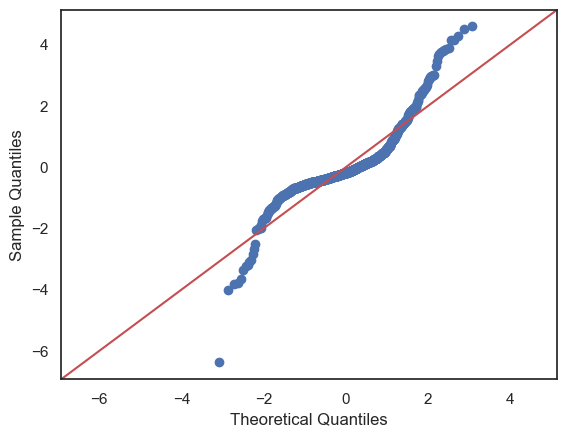

In [86]:
residualsS = model7.resid
fig7 = sm.graphics.qqplot(residualsS, dist=stats.norm, line='45', fit=True)
fig7.show()

In [87]:
#ok so we're getting somewhere now

In [96]:
# Log transform and normalize


# log features
log_names = [f'{column}_log' for column in spotify1.columns]

spotify1_log = np.log(spotify1)
spotify1_log.columns = log_names

# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

spotify1_log_norm = spotify1_log.apply(normalize)

In [97]:
preprocessed = pd.concat([spotify1_log_norm], axis=1)
preprocessed.head()

,in_spotify_playlists_log,streams_log
0,-1.052300,-0.645275
1,-0.316054,-0.693904
2,-0.356347,-0.653818
3,0.940753,0.867601
4,0.250194,0.020392


In [98]:
Xspot = preprocessed.drop('streams_log', axis=1)
yspot = preprocessed['streams_log']

In [100]:
X_int = sm.add_constant(Xspot)
model8 = sm.OLS(y,X_int).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            streams_log   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     1546.
Date:                Sat, 16 Dec 2023   Prob (F-statistic):          1.73e-201
Time:                        13:22:33   Log-Likelihood:                -890.51
No. Observations:                 952   AIC:                             1785.
Df Residuals:                     950   BIC:                             1795.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.473e-15      0.020   7.36e-14      1.000      -0.039       0.039
in_spotify_playlists_log     0.7870      0.020     39.320      0.000       0.748       0.826
==============================================================================
Omnibus:                      929.265   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136149.934
Skew:                          -4.029   Prob(JB):                         0.00
Kurtosis:                      61.029   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\nyssa\AppData\Local\Temp\ipykernel_27048\2637622877.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig8.show()


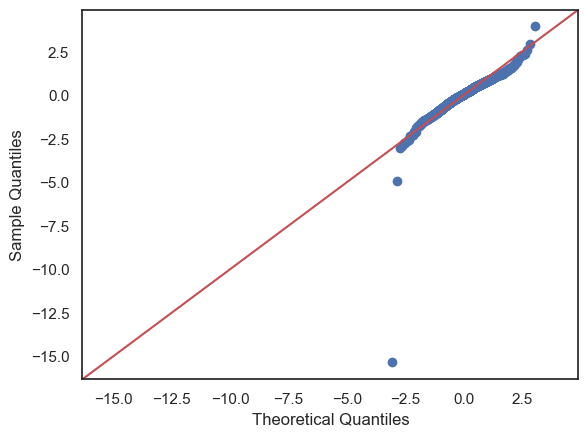

In [101]:
residuals8 = model8.resid
fig8 = sm.graphics.qqplot(residuals8, dist=stats.norm, line='45', fit=True)
fig8.show()

In [102]:
#now thats looking even better

In [103]:
#now to split and train the data for validation.

In [170]:
Xs= spotify3.drop('streams', axis=1)
ys= spotify3['streams']

In [171]:
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs, ys, random_state=42, train_size=0.75)

In [172]:
linreg = LinearRegression()

linreg.fit(Xs_train, ys_train)

LinearRegression()

In [173]:
from sklearn.metrics import mean_squared_error

In [174]:
train_mse = mean_squared_error(ys_train, ys_hat_train)
test_mse = mean_squared_error(ys_test, ys_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)

Train Mean Squared Error: 1.1530396750430474e+17
Test Mean Squared Error:  1.1945768783483576e+17


In [175]:
#finally to see if polynomial regression helps at all

degree 2 0.725121555850547
degree 3 0.7271915386679183
degree 4 0.7511825007345946


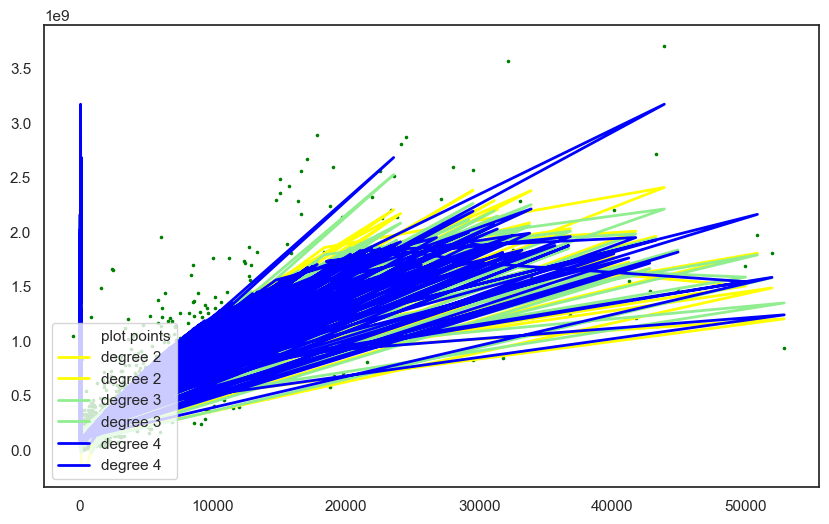

In [177]:
colors = ['yellow', 'lightgreen', 'blue']
plt.figure(figsize=(10, 6))
plt.scatter(spotify3['in_spotify_playlists'], spotify3['streams'], color='green', s=10, marker='.', label='plot points')

# We'll fit 3 different polynomial regression models from degree 2 to degree 4
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    Xs_poly_train = poly.fit_transform(Xs_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(Xs_poly_train, ys_train)
    
    # Transform the test data into polynomial features
    Xs_poly_test = poly.transform(Xs_test)
    
    # Get predicted values for transformed polynomial test data  
    ys_pred = reg_poly.predict(Xs_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(ys_test, ys_pred))
    
    # Transform the full data
    Xs_poly = poly.transform(Xs)
    
    # Now, we want to see what the model predicts for the entire data  
    ys_poly = reg_poly.predict(Xs_poly)
    
    # Create plot of predicted values
    plt.plot(Xs, ys_poly, color = colors[index], linewidth=2, label='degree %d' % degree)
    plt.legend(loc='lower left')

In [ ]:
#well thats a confusing graph so no that didn't help